In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from stockMarket.core import get_tickers_from_index

tickers = get_tickers_from_index('sp500')

In [3]:
from stockMarket.technicalAnalysis.trade import (
    TradeStatus,
    TradeSettings
)

TradeStatus.write_description_to_file("/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/trade_status_description.txt")

TradeSettings.write_description_to_file("/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/trade_settings_description.txt")

In [36]:
import pandas as pd

from stockMarket.technicalAnalysis.strategy import Strategy
from stockMarket.technicalAnalysis.trade import TradeSettings
from stockMarket.technicalAnalysis.enums import StrategyStoringBehavior
from stockMarket.technicalAnalysis.strategyObjects import (
    EMAStrategy,
    FIBStrategy,
    RSIStrategy,
    SMAStrategy,
)

settings = TradeSettings(
    loss_limit=0.2,
    min_PL=0.5,
    max_PL=3.0,
    min_TP_B_TC_B_to_LOW_RATIO=None,
    min_ratio_high_to_ref_candle=1.03,
    max_drawdown_ratio_after_new_high=0.95,
)

strategy = Strategy(
    # [FIBStrategy([0.3, 0.7])],
    [SMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7])],
    # [EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7])],
    # [EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7]), RSIStrategy(14, 60, 70)],
    start_date="06.03.2014",
    end_date="05.03.2024",
    candle_period="weekly",
    base_path="/home/jag/rclone/drive/stockMarket/Trading/strategy_testing",
    storing_behavior=StrategyStoringBehavior.NUMERICAL,
    trade_settings=settings,
    use_earnings_dates=False,
    finalize_commands=["~/bin/rclone/sync_stockMarket.sh push"],
    batch_size=pd.Timedelta(days=365),
)

strategy.screen(tickers)

 43%|████▎     | 216/503 [06:18<07:03,  1.48s/it]HAL: No price data found, symbol may be delisted (1d 2022-03-26 -> 2022-03-28)
HAL: No price data found, symbol may be delisted (1d 2016-11-12 -> 2016-11-14)
 97%|█████████▋| 487/503 [15:04<00:22,  1.39s/it]WMB: No price data found, symbol may be delisted (1d 2023-10-14 -> 2023-10-16)
WMB: No price data found, symbol may be delisted (1d 2022-03-26 -> 2022-03-28)
100%|██████████| 503/503 [15:36<00:00,  1.86s/it]


Pushing stockMarket to drive
Transferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                 1 / 1, 100%
Elapsed time:         1.2sTransferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                18 / 18, 100%
Elapsed time:         1.7sTransferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                36 / 36, 100%
Elapsed time:         2.2sTransferred:   	  396.375 KiB / 1.394 MiB, 28%, 0 B/s, ETA -
Checks:                85 / 85, 100%
Transferred:            0 / 12, 0%
Elapsed time:         2.7s
Transferring:
 * Trading/strategy_testi…03032024_05032024.xlsx:100% /80.382Ki, 0/s, -
 * Trading/strategy_testi…04032020_03032021.xlsx:100% /99.245Ki, 0/s, -
 * Trading/strategy_testi…04032021_03032022.xlsx:100% /120.804Ki, 0/s, -
 * Trading/strategy_testi…04032022_03032023.xlsx:100% /95.944Ki, 0/s, -Transferred:   	  396.375 KiB / 1.394 MiB, 28%, 0 B/s, ETA -
Checks:                85 / 85, 100%
Transferred:            0 / 12, 0%
Elapsed time:         3.2s
Tr

/home/jag/Trading/stockMarket/stockMarket/technicalAnalysis/strategy.py:263: RuntimeWarning: invalid value encountered in divide
  PL_ratio = win_counts / (win_counts + loss_counts)


Pushing stockMarket to drive
Transferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                 1 / 1, 100%
Elapsed time:         1.1sTransferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                18 / 18, 100%
Elapsed time:         1.6sTransferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                87 / 87, 100%
Elapsed time:         2.1s
Pushing stockMarket to drive
Transferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                 1 / 1, 100%
Elapsed time:         1.1sTransferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                18 / 18, 100%
Elapsed time:         1.6sTransferred:   	          0 B / 0 B, -, 0 B/s, ETA -
Checks:                38 / 38, 100%
Elapsed time:         2.1sTransferred:   	  250.801 KiB / 250.801 KiB, 100%, 0 B/s, ETA -
Checks:                87 / 87, 100%
Transferred:            0 / 1, 0%
Elapsed time:         2.6s
Transferring:
 * Trading/strategy_testi…A_6/trades_vs_time.png:100% /250.801Ki, 0/s, 

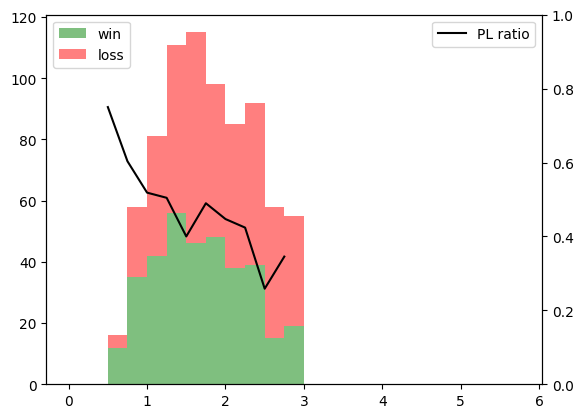

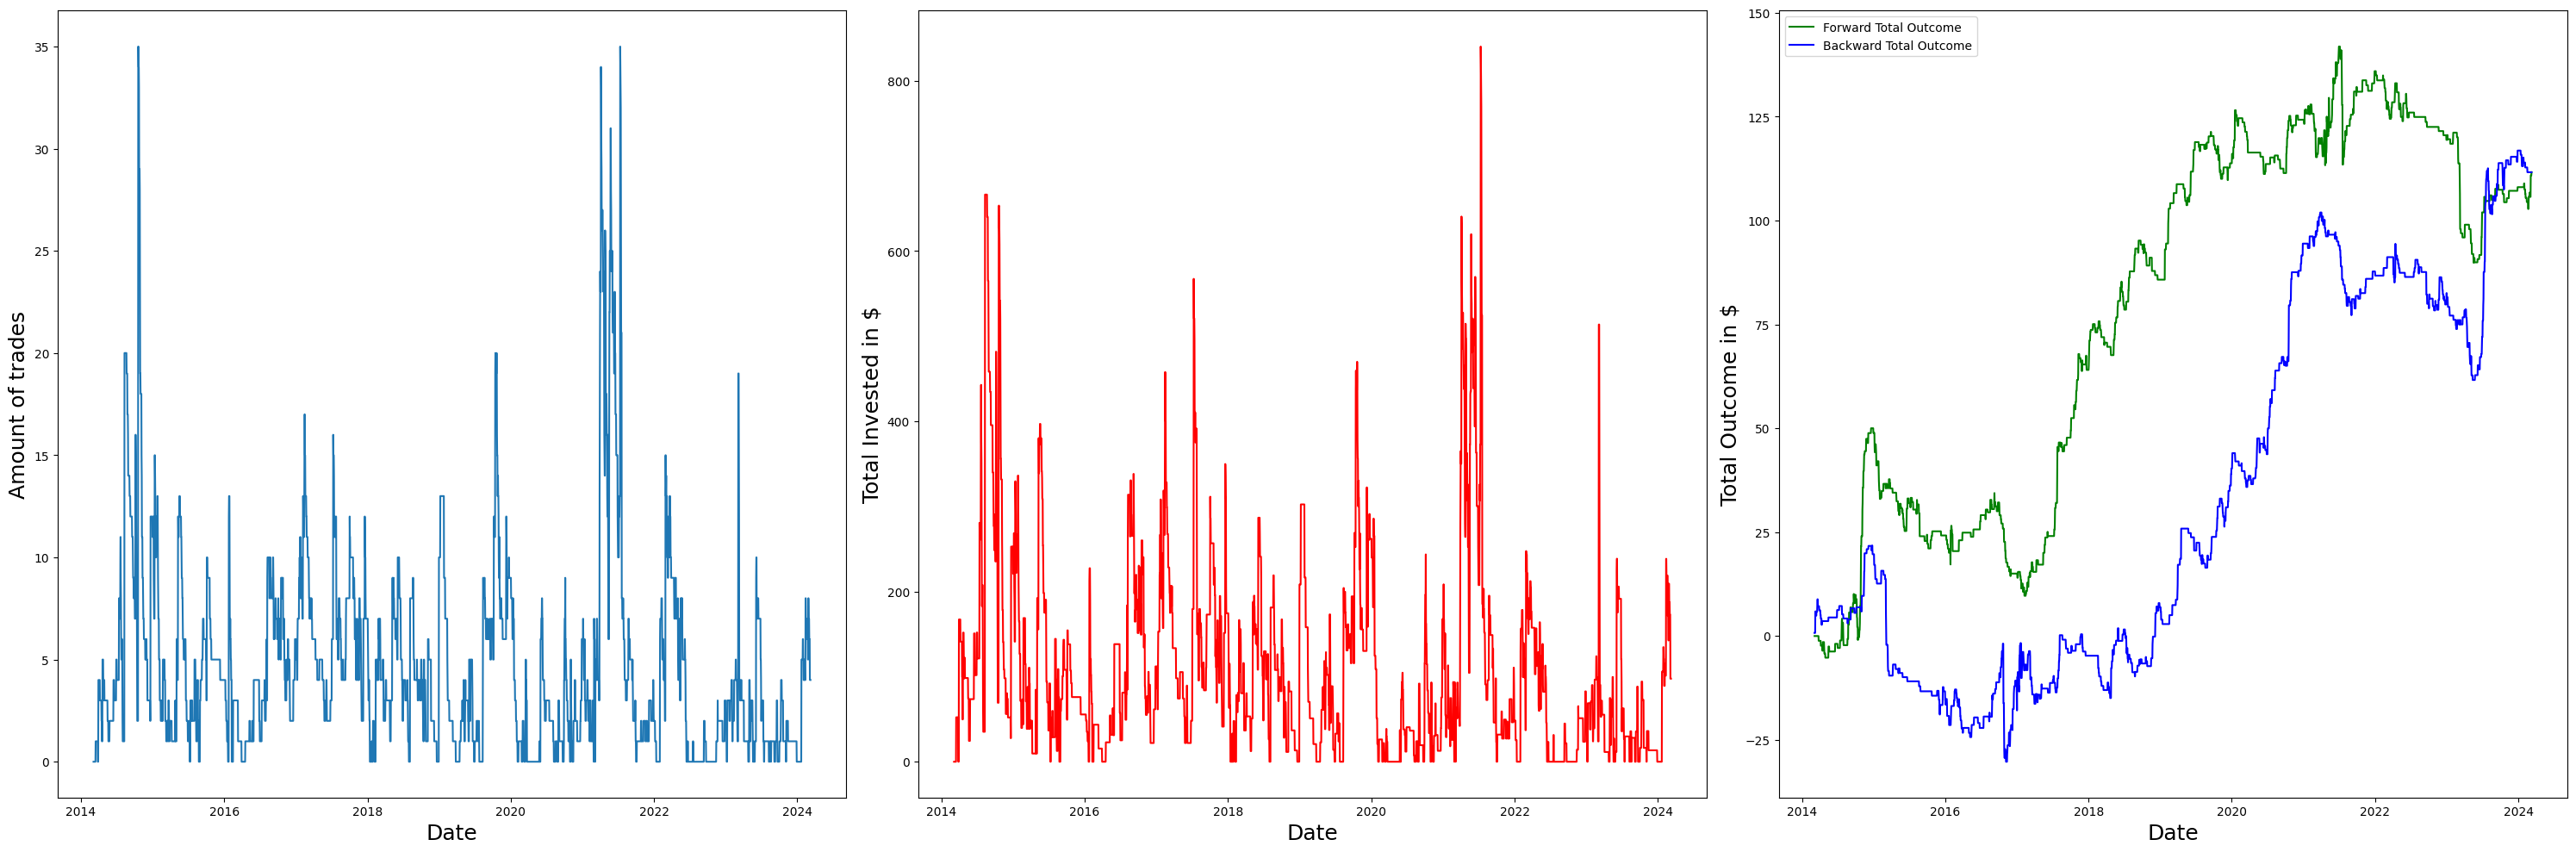

In [39]:
strategy.plot_PL_histogram()
strategy.plot_trades_vs_time()